In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from scipy.integrate import simpson
import time
from IPython.display import clear_output
plt.rcParams.update({'font.size': 14})


# Constants
c = 3e8                    # speed of light [m/s]
k_B = 8.617333262145e-5    # Boltzmann constant in eV/K
hbar = 6.582119569e-16     # Reduced Planck constant in eV*s
m_e = 5.485e-4             # electron mass [eV*(s/m)^2]
T_e = 300                  # electron system temperature [K]
E_F = 5.0                  # Chemical potential [eV]
T_F = E_F/k_B              # Fermi temperature [K]
E_L = 2.25                 # pump photon energy [eV]
EF_L = 5e2                 # pump field strength [V^2/m^2]
EF_sat = 1e13              # saturation field [V^2/m^2]
delta_E = (abs( EF_L / EF_sat)**2)        # non-equilibrium factor

**electronic density of states** (eDOS) in 3D

$$ \rho_e(\mathcal{E}) = \frac{{m_e}^{3/2}}{\pi^2\hbar^3}\sqrt{2\mathcal{E}} $$


In [5]:
def g(E):
    return ( ((m_e)**(3/2)) / ((np.pi**2)*(hbar**3)) )*np.sqrt(2*E)

**thermal (Fermi-Dirac) distribution** with approximated chemical potential.

$$
f^{T}(\mathcal{E}) = \frac{1}{\exp\Big(\frac{\mathcal{E}-\mu}{k_{B}T}\Big)+1} \quad\quad \mu(T) = \mathcal{E}_{\scriptsize F}\left[1- \frac{\pi^{2}}{12}\left( \frac{T}{T_{\scriptsize F}} \right)^{2}\right]
$$

In [6]:
def f_T(E):
    C = ((np.pi**2)/12)
    mu = E_F*( 1 - C*((T_e/T_F)**2))                        # chemical potential for fermi gas with T << T_F in 3D
    return 1 / (np.exp((E - mu) / (k_B * T_e)) + 1)

# Thermal Emission

**need to consider using the scipy.quad() integration which estimates the error.**

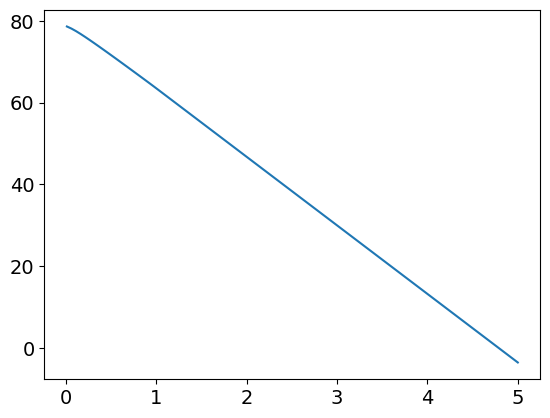

In [10]:
# emission integrand
def j_T(E, E_em):
        return f_T(E + E_em) * (1 - f_T(E)) * g(E + E_em) * g(E)

E_min = 0.0                               # lower integration limit [eV]
E_max = 10.0                              # lower integration limit [eV]
dE = 0.0001                               # lower integration limit [eV]
E = np.arange(E_min, E_max, dE)           # energy integration range [eV]
E_em_vals = np.linspace(0.01, 5.0, 100)   # emisison energy [eV]

#integration over energy
I_e_T = np.array( [simpson(j_T(E, E_em), E) for E_em in E_em_vals] )
plt.plot(E_em_vals, np.log10(I_e_T))

In [90]:
np.savetxt('intra_energy.txt', I_e_T, delimiter=',', fmt='%.18e')

# Nonequilibrium

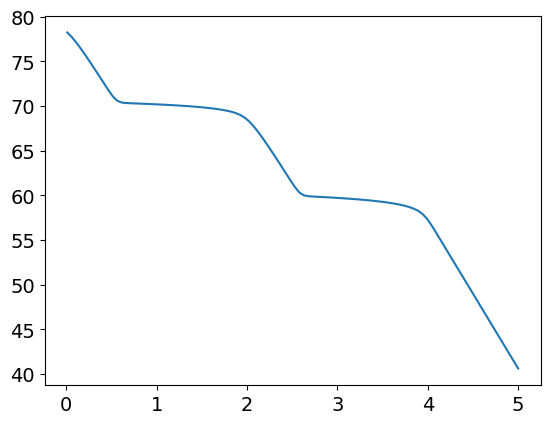

In [11]:
E_F = 2                  # Chemical potential [eV]
E_L = 2
delta_E = 1e-10

# nonthermal distribution
def f_NT(E):
    A = f_T(E - E_L)*( 1 - f_T(E) )
    B = f_T(E)*( 1 - f_T(E + E_L) )
    return delta_E*(A-B)

# nonequilibrium distribution
def f(E):
    return f_T(E) + f_NT(E)

def j(E, E_em):
    return f(E + E_em) * (1 - f(E)) * g(E + E_em) * g(E)

#integration over energy
I_e = np.array( [simpson(j(E, E_em), E) for E_em in E_em_vals] )

plt.plot(E_em_vals, np.log10(I_e))

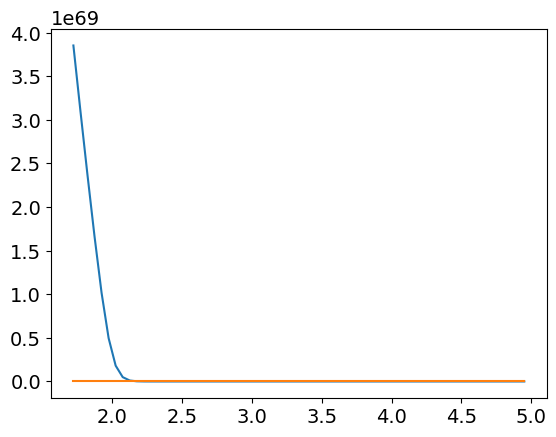

In [12]:
a = 34
plt.plot(E_em_vals[a:-1], I_e[a:-1])
plt.plot(E_em_vals[a:-1], I_e_T[a:-1])